<a href="https://colab.research.google.com/github/popspopspops/Antho_Sophie_Collectionneurs/blob/main/Principaux_collectionneurs_par_nationalit%C3%A9%2C_Sao_Paulo_1957.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <center> <h0>Cartographier avec Python</h0></center>




<center>Béatrice Joyeux-Prunel,
Chaire des Humanités numériques.
Cours d'introduction aux DH. <br>
Version du 16 nov. 2023</center>


Ce notebook contient un nombre volontairement limité de commentaires. L'objectif est que vous le commentiez lors du cours - ce qui facilite votre concentration et votre compréhension.


# Environnement, librairies, fichiers de travail

##  Librairies


In [9]:
import os
os.getcwd() #comme get current working directory

'/content'

In [2]:
os.listdir()

['.config', 'BasArt-Sophie+Anthony-SaoPaulo_1957.csv', 'sample_data']

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.ticker as ticker

In [ ]:
import datetime
today = datetime.date.today()
print("\n Dernière mise à jour : ", today)


 Dernière mise à jour :  2023-11-23


## Dossiers et fichiers de travail

#### Allez chercher dans la base Artlas la totalité des catalogues des expositions à étudier.

PAssez par l'interface de recherche avancée.
récupérez le fichier csv correspondant au résultat, et enregistrez-le dans votre dossier de travail (dans le drive de votre environnement JupyterNotebook, ou dans votre dossier de travail si vous travaillez en local).

#### Définition du chemin de travail

In [11]:
path = "BasArt-Sophie+Anthony-SaoPaulo_1957.csv"

#### Définition du tableau pour nos analyses

In [12]:
#Nous nommons la matrice  des données récupérées "df", comme dataframe.
#Dataframe veut dire, en gros, tableau de données.

SP1957 = pd.read_csv(path, sep=",")
#si vous obtenez une Parsing Error, remplacez le ; par une virgule et réexécutez la cellule.

#df = pd.read_csv(path, index_col=[0], sep=";")
#si la première colonne permet d'indexer les données (pas le cas ici)

In [13]:
SP1957
#df.info() /si je veux les infos de toutes les colonnes

,ARTWORK Number,Title of artwork,Subtitle,Title translation,Medium,Room,Work Category,Work Dimensions,Date of work begining,Date of work ending,...,Exhibition Begin date,Exhibition End Date,Exhibition Space,Exhibition Country,Exhibition State,Exhibition City,Longitude Exhibition City,Latitude Exhibition City,Contributor,Column
0,1,A ARVORE,NaN,NaN,NaN,NaN,[pintura],116 x 104. Co1,1949.0,NaN,...,1957,0,NaN,Brazil,São Paulo,São Paulo,-46.633947,-23.550394,Roman Perera,NaN
1,2,O PASSARO,NaN,NaN,NaN,NaN,[pintura],100 x 81,1956.0,NaN,...,1957,0,NaN,Brazil,São Paulo,São Paulo,-46.633947,-23.550394,Roman Perera,NaN
2,6,MENINA ESCREVENDO,NaN,NaN,NaN,NaN,[pintura],32 x 40,1925.0,NaN,...,1957,0,NaN,Brazil,São Paulo,São Paulo,-46.633947,-23.550394,Roman Perera,NaN
3,7,MENINA NA VARANDA,NaN,NaN,NaN,NaN,[pintura],77 x 66,1925.0,NaN,...,1957,0,NaN,Brazil,São Paulo,São Paulo,-46.633947,-23.550394,Roman Perera,NaN
4,8,MULHER DE VARMLAND,NaN,NaN,NaN,NaN,[pintura],98 x 65,1933.0,NaN,...,1957,0,NaN,Brazil,São Paulo,São Paulo,-46.633947,-23.550394,Roman Perera,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,8,DUAS AMIGAS,NaN,NaN,Mármore,NaN,"[SALA ESPECIAL, escultura]",80,1936.0,NaN,...,1957,0,NaN,Brazil,São Paulo,São Paulo,-46.633947,-23.550394,Roman Perera,NaN
1364,63,PINTURA I,NaN,NaN,NaN,NaN,[pintura],50 x 73,1956.0,NaN,...,1957,0,NaN,Brazil,São Paulo,São Paulo,-46.633947,-23.550394,Roman Perera,NaN
1365,64,PINTURA 2,NaN,NaN,NaN,NaN,[pintura],54 x 100,1956.0,NaN,...,1957,0,NaN,Brazil,São Paulo,São Paulo,-46.633947,-23.550394,Roman Perera,NaN
1366,65,PINTURA 3,NaN,NaN,NaN,NaN,[pintura],116 x 73,1957.0,NaN,...,1957,0,NaN,Brazil,São Paulo,São Paulo,-46.633947,-23.550394,Roman Perera,NaN


## (quelques rappels / réflexes à acquérir) Regarder les données ; premiers tris et décomptes

### Lire les donnnées  `.head()`, `.tail()`.

* 1ère étape, **lire les données** (le head, c'est à dire "son en-tête", et par défaut les 5 premières lignes).



In [ ]:
df.head()

,ARTWORK Number,Title of artwork,Subtitle,Title translation,Medium,Room,Work Category,Work Dimensions,Date of work begining,Date of work ending,...,Exhibition Begin date,Exhibition End Date,Exhibition Space,Exhibition Country,Exhibition State,Exhibition City,Longitude Exhibition City,Latitude Exhibition City,Contributor,Unnamed: 86
0,NaN,Stagione dei Prati rossi e dei Campi Versi,NaN,NaN,peinture,NaN,NaN,NaN,NaN,NaN,...,1895-04-22,1895-10-22,NaN,Italy,NaN,Venise,12.331944,45.439722,Félicie de Maupeou,NaN
1,NaN,Precessione,NaN,NaN,peinture,NaN,NaN,NaN,1892,NaN,...,1895-04-22,1895-10-22,NaN,Italy,NaN,Venise,12.331944,45.439722,Félicie de Maupeou,NaN
2,NaN,Ritratto della signora Sofia Abbiati,NaN,NaN,peinture,NaN,NaN,NaN,NaN,NaN,...,1895-04-22,1895-10-22,NaN,Italy,NaN,Venise,12.331944,45.439722,Félicie de Maupeou,NaN
3,NaN,Giorno d'Estate in Norvegia,NaN,NaN,peinture,NaN,NaN,NaN,NaN,NaN,...,1895-04-22,1895-10-22,NaN,Italy,NaN,Venise,12.331944,45.439722,Félicie de Maupeou,NaN
4,NaN,Notte d'Estae in Norvegia,NaN,NaN,peinture,NaN,NaN,NaN,NaN,NaN,...,1895-04-22,1895-10-22,NaN,Italy,NaN,Venise,12.331944,45.439722,Félicie de Maupeou,NaN


* Lire les xx premières lignes: df.head(xx)

On se souvient que **Python, comme beaucoup de langages de programmation, indexe les lignes en commençant par 0**. Si je veux donc lui demander de lire les lignes de 1 à 3,  sachant que la ligne zéro concerne les titres de colonnes, il faudra lui indiquer l'index 3.

In [ ]:
df.head(3)

,ARTWORK Number,Title of artwork,Subtitle,Title translation,Medium,Room,Work Category,Work Dimensions,Date of work begining,Date of work ending,...,Exhibition Begin date,Exhibition End Date,Exhibition Space,Exhibition Country,Exhibition State,Exhibition City,Longitude Exhibition City,Latitude Exhibition City,Contributor,Unnamed: 86
0,NaN,Stagione dei Prati rossi e dei Campi Versi,NaN,NaN,peinture,NaN,NaN,NaN,NaN,NaN,...,1895-04-22,1895-10-22,NaN,Italy,NaN,Venise,12.331944,45.439722,Félicie de Maupeou,NaN
1,NaN,Precessione,NaN,NaN,peinture,NaN,NaN,NaN,1892,NaN,...,1895-04-22,1895-10-22,NaN,Italy,NaN,Venise,12.331944,45.439722,Félicie de Maupeou,NaN
2,NaN,Ritratto della signora Sofia Abbiati,NaN,NaN,peinture,NaN,NaN,NaN,NaN,NaN,...,1895-04-22,1895-10-22,NaN,Italy,NaN,Venise,12.331944,45.439722,Félicie de Maupeou,NaN


* Que fait df.tail() à votre avis?

### Décrire rapidement les données `.info()`, `.describe()`.

* Informations sur le fichier : **la fonction `.info`**

* La fonction **`df.describe()`** renvoie un dataframe donnant des statistiques sur les valeurs (nombres de valeurs, moyenne, écart-type, ...), mais uniquement sur les colonnes numériques.

In [ ]:
df.describe()

,Work conception state,Longitude work conception city,Latitude work conception city,Artwork Price,Longitude owner city,Latitude owner city,Longitude Exhibitor City,Latitude Exhibitor City,Longitude Exhibitor Address,Latitude Exhibitor Address,...,Latitude Exhibitor Death City,Longitude Exhibitor Death Address,Latitude Exhibitor Death Address,Exhibitor Death Address Road number,Exhibitor Death Address Complement,Longitude Exhibition Section,Latitude Exhibition Section,Longitude Exhibition City,Latitude Exhibition City,Unnamed: 86
count,0.0,3.000000,3.000000,0.0,1345.000000,1345.000000,6990.000000,6990.000000,10644.000000,10644.000000,...,1333.000000,1487.000000,1487.000000,0.0,0.0,29477.000000,29477.000000,29477.000000,29477.000000,0.0
mean,NaN,13.149500,43.718527,NaN,-15.711352,44.274400,-14.520240,14.790053,-9.001792,22.832974,...,33.952652,-7.315714,35.363316,NaN,NaN,-13.777563,11.370200,-13.771214,11.376418,NaN
std,NaN,18.786173,7.916870,NaN,42.079391,13.393264,49.082015,28.377585,50.329706,28.700139,...,26.737555,24.240118,25.674953,NaN,NaN,31.955693,33.053806,31.955674,33.052338,NaN
min,NaN,-4.000000,35.050025,NaN,-122.416389,-37.814167,-122.416389,-35.387551,-122.416389,-36.604765,...,-34.599722,-139.500000,-34.599722,NaN,NaN,-46.655012,-23.585901,-46.633947,-23.550394,NaN
25%,NaN,3.110140,40.294457,NaN,-66.933333,40.700000,-53.092482,-10.780859,-53.092482,-10.780859,...,44.605000,-0.183056,43.682778,NaN,NaN,-46.633947,-23.550394,-46.633947,-23.550394,NaN
50%,NaN,10.220281,45.538889,NaN,2.352222,48.856667,-8.590838,26.492920,2.455793,36.241945,...,44.605000,-0.183056,44.605000,NaN,NaN,2.293952,31.197500,2.352222,31.197500,NaN
75%,NaN,21.724249,48.052778,NaN,8.785556,50.846667,22.974819,39.587147,20.053819,45.466944,...,46.768900,4.097500,48.826111,NaN,NaN,12.331944,45.439722,12.331944,45.439722,NaN
max,NaN,33.228218,50.566667,NaN,151.210000,59.913333,151.210000,64.998316,151.210000,64.998316,...,59.329444,19.221389,59.329444,NaN,NaN,139.692222,48.872360,139.692222,48.856667,NaN


* `df.describe(include = 'all')` pour **prendre en compte toutes les données, pas juste les colonnes vides ou contenant des valeurs numériques**

In [ ]:
df.describe(include = 'all')

,ARTWORK Number,Title of artwork,Subtitle,Title translation,Medium,Room,Work Category,Work Dimensions,Date of work begining,Date of work ending,...,Exhibition Begin date,Exhibition End Date,Exhibition Space,Exhibition Country,Exhibition State,Exhibition City,Longitude Exhibition City,Latitude Exhibition City,Contributor,Unnamed: 86
count,22609,29424,58,220,17772,8835,17263,15609,10368.0,13881.0,...,29477,29454,18129,29477,11727,29477,29477.000000,29477.000000,29477,0.0
unique,712,23322,49,220,2108,164,143,8183,237.0,208.0,...,32,30,20,6,1,7,NaN,NaN,22,NaN
top,1,Sem título,Calligraphie Arabe,Adhérence liée,Óleo sobre tela,Sala Geral,Peinture,50x70,1963.0,1965.0,...,1963-09-28,1963-12-22,Parque Ibirapuera,Brazil,São Paulo,São Paulo,NaN,NaN,Thomas Gauffroy-Naudin,NaN
freq,911,265,3,1,1434,2086,3511,108,1089.0,1122.0,...,3936,3936,3936,13760,11727,13760,NaN,NaN,3936,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-13.771214,11.376418,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,31.955674,33.052338,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-46.633947,-23.550394,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-46.633947,-23.550394,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.352222,31.197500,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.331944,45.439722,NaN,NaN


**`df.describe(include = 'all').to_csv(sys.stdout, sep = ' ')`** permet de générer un fichier csv contnant les statistiques descriptives de toutes les colonnes (numériques ou non).

### Sélectionner / afficher / supprimer une ou des colonnes spécifiques. `[les colonnes]`

In [ ]:
df[df.columns[[1]]]

,Title of artwork
0,Stagione dei Prati rossi e dei Campi Versi
1,Precessione
2,Ritratto della signora Sofia Abbiati
3,Giorno d'Estate in Norvegia
4,Notte d'Estae in Norvegia
...,...
29472,Escultura
29473,Preto/Branco/Preto
29474,Sem título
29475,Pintura 3


In [8]:
SP1957.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [ ]:
# Afficher les colonnes 1 à 3 (qui pour mon tableur
#permettent d'accéder au n°, au titre et au sous-titre des oeuvres les oeuvres)
#new df = df[["EXHIBITOR Name","Exhibitor First name", "Exhibitor Gender"]]
df[df.columns[[0,1,2,]]]
#il faudra également changer les numéros des colonnes pour que l'affichage corresponde à votre dataframe.
#val: oui bon, mais cette fois-ci on a pas besoin de le faire car c'est déjà dans l'ordre

,ARTWORK Number,Title of artwork,Subtitle
0,NaN,Stagione dei Prati rossi e dei Campi Versi,NaN
1,NaN,Precessione,NaN
2,NaN,Ritratto della signora Sofia Abbiati,NaN
3,NaN,Giorno d'Estate in Norvegia,NaN
4,NaN,Notte d'Estae in Norvegia,NaN
...,...,...,...
29472,1,Escultura,NaN
29473,10,Preto/Branco/Preto,NaN
29474,34,Sem título,NaN
29475,56,Pintura 3,NaN


#### Nota : `Dtype`,`float64`

- ** les crochets** : ils doivent être au nombre complet, et toujours fermés.
- D'après df.info(), certaines colonnes contiennent des données au format "float64". Python les affichera avec des chiffres après la virgule.
Dans df.info(),  **'Dtype'**  signifie "type de données" et **'float64'**, nombre à virgule 'flottante' d'où le "Float", qui prend 64 bits de mémoire.

### Dénombrer : `.value_counts()`

#### Quels sont les pays de naissance les plus représentés *en fonction des oeuvres exposées*?

In [ ]:
df['Exhibitor Birth Country'].value_counts()#comptage des valeurs uniques

Exhibitor Birth Country
Italy            2466
France           1283
Egypt            1100
Brazil            986
Spain             701
                 ... 
Pakistan            2
New Zealand         1
Côte d'Ivoire       1
Malta               1
Latvia              1
Name: count, Length: 95, dtype: int64

In [ ]:
#### ATTENTION : on compte ici des oeuvres.... ####
#### Chaque pays est représenté autant de fois qu'une oeuvre est exposée par un artiste de ce pays

Le résultat est **une "série"** (la fonction ```type(objet)```permet de savoir quelle est la nature de l'objet manipulé).

In [ ]:
comptage = df['Exhibitor Birth Country'].value_counts()
type(comptage)

pandas.core.series.Series

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29477 entries, 0 to 29476
Data columns (total 87 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ARTWORK Number                       22609 non-null  object 
 1   Title of artwork                     29424 non-null  object 
 2   Subtitle                             58 non-null     object 
 3   Title translation                    220 non-null    object 
 4   Medium                               17772 non-null  object 
 5   Room                                 8835 non-null   object 
 6   Work Category                        17263 non-null  object 
 7   Work Dimensions                      15609 non-null  object 
 8   Date of work begining                10368 non-null  object 
 9   Date of work ending                  13881 non-null  object 
 10  Work conception country              3 non-null      object 
 11  Work conception state       

In [ ]:
#pour réutiliser la fonction type : exécutez la commande suivante :
type(df)#affiche moi la nature de l'objet df

pandas.core.frame.DataFrame

Il vous répond que c'est un dataframe.

#### Quels sont les pays de résidence représentés? à vous !

In [ ]:
df['Exhibitor Country'].value_counts()

Exhibitor Country
Brazil               2127
Egypt                 741
Spain                 724
France                563
Italy                 530
                     ... 
Philippines             5
Senegal                 3
Slovakia                2
Macedonia (FYROM)       2
Northern Ireland        1
Name: count, Length: 81, dtype: int64

#### Quelles sont les 3 villes de résidence les plus représentées? à vous encore!

In [ ]:
df['Exhibitor City'].value_counts()

Exhibitor City
São Paulo         301
Rio de Janeiro    242
New York          124
Madrid            107
Asunción           74
                 ... 
Rapallo             1
Kent                1
Columbia            1
Bourges             1
Temara              1
Name: count, Length: 209, dtype: int64

Appelons ce résultat "cities". Attention, il compte le nombre de fois où une oeuvre est comptée. il ne compte pas les villes en fonction des exposants.

In [ ]:
cities = df['Exhibitor City'].value_counts()

In [ ]:
type(cities)

In [ ]:
cities[0:3]
#on cherche dans l'index de cities, affiche les 4 éléments [0 à 3]

Transformons cette série en tableau, pour mieux l'afficher.

In [ ]:
cities = cities.to_frame()
#je réassigne cities. maintenant, tu as un nouveau look.

In [ ]:
#on réinitialise l'index de ce tableau

In [ ]:
cities = cities.reset_index()

In [ ]:
cities

,Exhibitor City,count
0,São Paulo,301
1,Rio de Janeiro,242
2,New York,124
3,Madrid,107
4,Asunción,74
...,...,...
204,Rapallo,1
205,Kent,1
206,Columbia,1
207,Bourges,1


In [ ]:
### attention à bien comprendre ce qu'il y a dans le tableau:

In [ ]:
#Renommer les colonnes
cities.columns = ['Exhibitor City', "nbr d\'oeuvres par artiste qui vit là "]

In [ ]:
cities

,Exhibitor City,nbr d'oeuvres par artiste qui vit là
0,São Paulo,301
1,Rio de Janeiro,242
2,New York,124
3,Madrid,107
4,Asunción,74
...,...,...
204,Rapallo,1
205,Kent,1
206,Columbia,1
207,Bourges,1


# PREPARATION DES DONNEES

## Harmonisation des noms de lieux

In [ ]:
df.info()
#mince, certaines villes ont plusieurs nom: Athena, Athènes.
# on va travailler sur les colonnes 34,35,36. soit Exhibitor City, Longitude Exhibitor City, Latitude Exhibitor City.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29477 entries, 0 to 29476
Data columns (total 87 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ARTWORK Number                       22609 non-null  object 
 1   Title of artwork                     29424 non-null  object 
 2   Subtitle                             58 non-null     object 
 3   Title translation                    220 non-null    object 
 4   Medium                               17772 non-null  object 
 5   Room                                 8835 non-null   object 
 6   Work Category                        17263 non-null  object 
 7   Work Dimensions                      15609 non-null  object 
 8   Date of work begining                10368 non-null  object 
 9   Date of work ending                  13881 non-null  object 
 10  Work conception country              3 non-null      object 
 11  Work conception state       

In [ ]:
## à tester duplicates_df = df[df.duplicated(subset=['Longitude Exhibitor City','Latitude Exhibitor City'], keep=False)]
#val: ah non, ça ne marche pas. Parce que je ne veux PAS supprimer Athena. Je veux garder Athene et Athena et les nommer pareil.

In [ ]:
residencecrade = df[df.columns[[34,35,36]]]

In [ ]:
residencecrade = residencecrade.drop_duplicates(keep = 'first', inplace=False)
#virer les identiques: Athène, Athène Athène = Athène.

In [ ]:
residencecrade

,Exhibitor City,Longitude Exhibitor City,Latitude Exhibitor City
0,NaN,NaN,NaN
4676,NaN,-65.178191,-35.387551
4678,NaN,-73.083842,3.909413
4682,NaN,-86.625454,14.820676
4685,NaN,-66.168840,7.127732
...,...,...,...
28991,Villa de los Santos,-80.414300,7.934800
29030,Vedado,-82.358889,23.136667
29043,Montreal,-73.561667,45.508889
29157,Temara,-6.907647,33.923367


In [ ]:
#chatGPT: soit un df, dont je regarde les colonnes 33,34,35. Donne moi la liste de tous les duplicates dans les colonnes 35,36 avec python

In [ ]:
#CHatGPT: Supposons que votre DataFrame s'appelle df et que vous ayez déjà identifié les duplicatas dans les colonnes 35 et 36
#Sélectionner les lignes de 'residencecrade' où les valeurs de 'Longitude Exhibitor City' et 'Latitude Exhibitor City' sont dans les duplicatas
duplicatas_villes = residencecrade[residencecrade.duplicated(subset = ['Longitude Exhibitor City', 'Latitude Exhibitor City'], keep = False)]
duplicatas_villes

,Exhibitor City,Longitude Exhibitor City,Latitude Exhibitor City
10451,Alexandrie,29.892500,31.197500
10622,Barcelone,2.176944,41.382500
11007,Beograd,20.456944,44.817778
11008,Zagreb,15.977222,45.813056
11397,Athènes,23.728056,37.984167
11755,Dubrovnik et Zagreb,15.977222,45.813056
25771,Stuttgart,9.180000,48.777500
25779,London,-0.127500,51.507222
25791,Prague,14.421389,50.087500
25794,Warsaw,21.011111,52.230000


In [ ]:
#ok. maintenant on crée une liste avec les mauvais mots, et une avec les nouveaux

#À CORRIGER. attention durant le cours on s'est trompé avec “Barcelone “ on a mis l'espace au début au lieu de la fin.

mauvais=("Alexandrie","Athenes","Athènes","Barcelone","Barcelone ","Belgrad","Beograd","Badapest","Dubrovnik et Zagreb",
         "Düsseldorf", "Genève","Vedado","Londres", "Montréal", "Praga", "San Fransisco", "Seul", "Séoul", "Sttutgart",
         "Varsovie", "Vien", "Vienne", "Wrocalw","Zürich")

nouveau= ("Alexandria","Athens","Athens","Barcelona","Barcelona","Belgrade","Belgrade","Budapest","Zagreb",
         "Dusseldorf", "Geneva","Havana","London", "Montreal", "Prague", "San Francisco", "Seoul", "Seoul", "Stuttgart",
         "Warsaw", "Vienna", "Vienna", "Wroclaw","Zurich")

In [ ]:
#chatGPT input: sachant que mauvais = () et que nouveau = () remplace tous les mauvais par nouveau dans la colonne df["Exhibitor City"]

In [ ]:
# Mtn, on définit le dictionnaire de correspondance entre les anciennes et les nouvelles valeurs
correspondance_villes = dict(zip(mauvais, nouveau))

# On remplace les valeurs dans la colonne 'Exhibitor City'
df['Exhibitor City'] = df['Exhibitor City'].replace(correspondance_villes)

## Supprimer des doublons de villes

In [ ]:
cities = df['Exhibitor City']

In [ ]:
cities

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
              ...      
29472          Salvador
29473         São Paulo
29474         São Paulo
29475    Rio de Janeiro
29476    Rio de Janeiro
Name: Exhibitor City, Length: 29477, dtype: object

In [ ]:
#puis on supprime les doublons
cities.drop_duplicates(keep = 'first', inplace=True)

In [ ]:
cities.reset_index()
cities.head(60)

0                     NaN
10451          Alexandria
10548              Madrid
10607             Séville
10622           Barcelona
10630             Valence
10985               Split
11007            Belgrade
11008              Zagreb
11397              Athens
11522               Jaen 
11723            Novi Sad
11724           Ljubljana
11738              Skopje
16569        Johannesburg
25771           Stuttgart
25772            New York
25773           Gorinchem
25774               Paris
25776           Amsterdam
25778               Milan
25779              London
25781             Niigata
25782               Osaka
25785            Shizuoka
25787               Tokyo
25788        Hitachi City
25791              Prague
25792            Yokohama
25793                Rome
25794              Warsaw
25797           Shimosuwa
25798               Turin
25799            Pasadena
25800               Kyoto
25801              Anvers
25804          Dusseldorf
25805            Büderich
25806       

In [ ]:
cities = cities.to_frame()

## Génération de la liste des artistes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29477 entries, 0 to 29476
Data columns (total 87 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ARTWORK Number                       22609 non-null  object 
 1   Title of artwork                     29424 non-null  object 
 2   Subtitle                             58 non-null     object 
 3   Title translation                    220 non-null    object 
 4   Medium                               17772 non-null  object 
 5   Room                                 8835 non-null   object 
 6   Work Category                        17263 non-null  object 
 7   Work Dimensions                      15609 non-null  object 
 8   Date of work begining                10368 non-null  object 
 9   Date of work ending                  13881 non-null  object 
 10  Work conception country              3 non-null      object 
 11  Work conception state       

In [ ]:
#ok donc voici toutes les colonnes qui caractérisent nos artistes:
Exhibitors = df[df.columns[[24, 25, 26, 32, 33, 34, 35, 36]]]
Exhibitors

,EXHIBITOR Name,Exhibitor First name,Exhibitor Gender,Exhibitor Country,Exhibitor State,Exhibitor City,Longitude Exhibitor City,Latitude Exhibitor City
0,Pedersen,Viggo Christien,M,NaN,NaN,NaN,NaN,NaN
1,Pellizza da Volpedo,Giuseppe,M,NaN,NaN,NaN,NaN,NaN
2,Pellizza da Volpedo,Giuseppe,M,NaN,NaN,NaN,NaN,NaN
3,Peterssen,Eilif,M,NaN,NaN,NaN,NaN,NaN
4,Peterssen,Eilif,M,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
29472,ALMANDRADE,A. L. M. Andrade,M,Brazil,Bahia,Salvador,-38.492778,-12.983056
29473,BARSOTTI,Hércules,M,Brazil,São Paulo,São Paulo,-46.633947,-23.550394
29474,FAJARDO,Carlos,M,Brazil,São Paulo,São Paulo,-46.633947,-23.550394
29475,SUED,Eduardo,M,Brazil,Rio de Janeiro,Rio de Janeiro,-43.196389,-22.908333


In [ ]:
type(Exhibitors)

In [ ]:
Exhibitors.reset_index()

In [ ]:
Exhibitors.drop_duplicates(keep = 'first', inplace=True)

In [ ]:
# petit check pour voir si des aristes ont changé d'adresse
Exhibitorssansadresse = df[df.columns[[24, 25, 26, 32]]] #(j'ai pris que les premières colonnes (nom, prénom, genre et pays)
Exhibitorssansadresse.drop_duplicates(keep = 'first', inplace=True)
#afficher la liste
Exhibitorssansadresse
#Il y a moins d'occurence dans cette liste (29458) que Exhibitors (29476) qu'on a fait avant,
# attention, il a donc 16 artistes qui ont donc changé d'adresse et sont comptés 2x!!

/tmp/ipykernel_1441/3354149088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Exhibitorssansadresse.drop_duplicates(keep = 'first', inplace=True)


,EXHIBITOR Name,Exhibitor First name,Exhibitor Gender,Exhibitor Country
0,Pedersen,Viggo Christien,M,NaN
1,Pellizza da Volpedo,Giuseppe,M,NaN
3,Peterssen,Eilif,M,NaN
5,Prati,Eugenio,M,NaN
7,Prati,Giulio Cesare,M,NaN
...,...,...,...,...
29410,ROSA,Dudi Maia,M,Brazil
29422,SUED,Eduardo,M,Brazil
29432,CASTRO,Willys de,M,Brazil
29435,VIEIRA,Décio,M,Brazil


<ipython-input-22-2fe31006eb15>:23: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (category, count) in enumerate(top_categories.iteritems()):


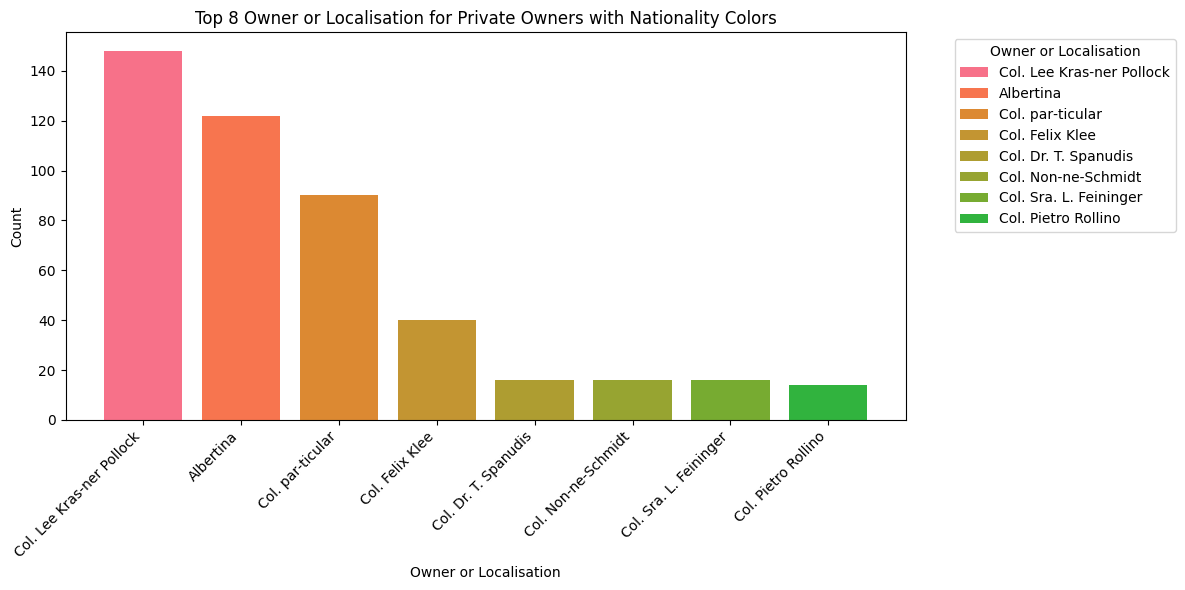

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que votre DataFrame s'appelle df
# Assurez-vous de remplacer 'Nom_de_votre_colonne' par le nom réel de votre colonne
# et 'Votre_dataframe.csv' par le nom de votre fichier ou DataFrame

# Chargez votre DataFrame depuis le fichier CSV ou à partir de votre source de données
# df = pd.read_csv('Votre_dataframe.csv')

# Filtrez les lignes où la colonne "Owner category" est égale à "Private"
private_df = SP1957[SP1957['Owner category'] == 'Private']

# Comptez les occurrences de chaque catégorie dans la colonne "Owner or Localisation"
top_categories = private_df['Owner or Localisation'].value_counts().head(8)

# Créez un dictionnaire de couleurs pour chaque nationalité
nationality_colors = sns.color_palette('husl', n_colors=len(SP1957['Owner Country'].unique()))

# Créez un graphique à barres en attribuant une couleur différente à chaque barre
plt.figure(figsize=(12, 6))
for i, (category, count) in enumerate(top_categories.iteritems()):
    # Filtrez les données pour la catégorie actuelle
    category_data = private_df[private_df['Owner or Localisation'] == category]

    # Obtenez la couleur correspondant à la nationalité
    nationality_color = nationality_colors[i % len(nationality_colors)]

    # Créez une barre avec la couleur correspondante
    plt.bar(category, count, color=nationality_color, label=category)

# Ajoutez une légende avec les couleurs correspondant aux nationalités
plt.legend(title='Owner or Localisation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Top 8 Owner or Localisation for Private Owners with Nationality Colors')
plt.xlabel('Owner or Localisation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



<ipython-input-44-e5557fe281ee>:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (category, count) in enumerate(top_categories.iteritems()):


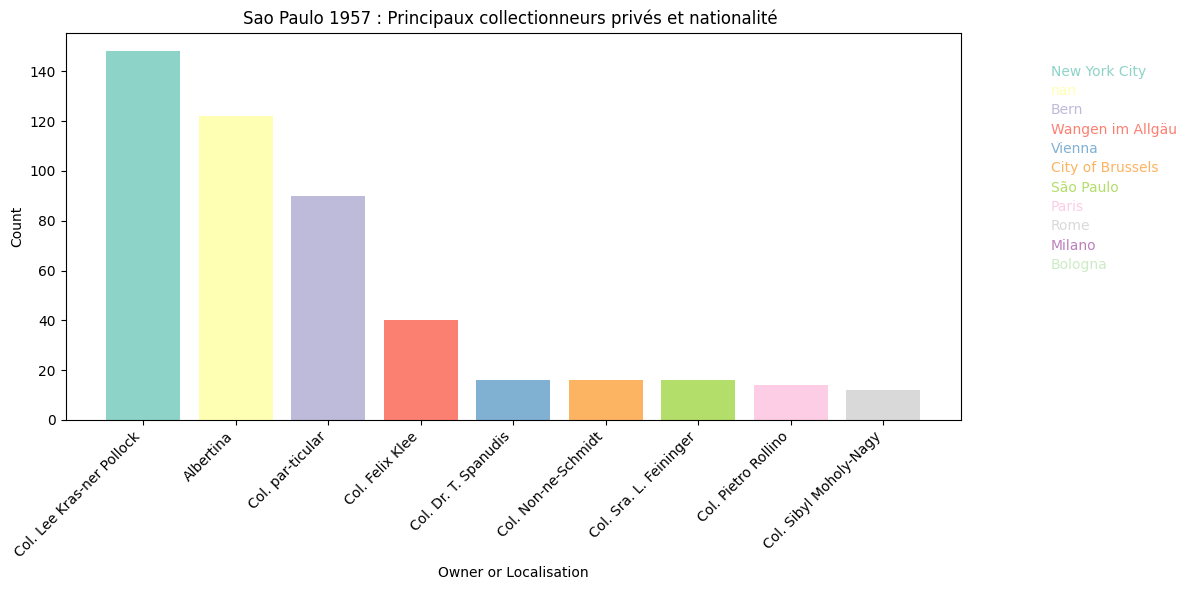

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrez les lignes où la colonne "Owner category" est égale à "Private"
private_df = SP1957[SP1957['Owner category'] == 'Private']

# Comptez les occurrences de chaque catégorie dans la colonne "Owner or Localisation"
top_categories = private_df['Owner or Localisation'].value_counts().head(9)

# Créez un dictionnaire de couleurs pour chaque nationalité avec une palette plus distinctive
nationality_colors = sns.color_palette('Set3', n_colors=len(SP1957['Owner City'].unique()))

# Créez un graphique à barres en attribuant une couleur différente à chaque barre
plt.figure(figsize=(12, 6))
for i, (category, count) in enumerate(top_categories.iteritems()):
    # Filtrez les données pour la catégorie actuelle
    category_data = private_df[private_df['Owner or Localisation'] == category]

    # Obtenez la couleur correspondant à la nationalité
    nationality_color = nationality_colors[i % len(nationality_colors)]

    # Créez une barre avec la couleur correspondante
    plt.bar(category, count, color=nationality_color, label=category)

# Ajoutez une légende avec les couleurs correspondant aux nationalités
legend_labels = SP1957[SP1957['Owner or Localisation'].isin(top_categories.index)][['Owner City']].drop_duplicates()
for i, (_, country) in enumerate(legend_labels.iterrows()):
    plt.text(1.1, 0.9 - i * 0.05, f"{country['Owner City']}", color=nationality_colors[i % len(nationality_colors)],
             ha='left', va='center', transform=plt.gca().transAxes)



plt.title('Sao Paulo 1957 : Principaux collectionneurs privés et leur nationalité ')
plt.xlabel('Owner or Localisation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
